In [1]:
# import libraries
import csv
import string
from collections import Counter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import sys, os
import matplotlib.pyplot as plt

os.chdir(sys.path[0])

# Step 1: Get Description
descriptions = []
with open('google_reviews.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        descriptions.append(row['description'])

descriptions

['I have invited a 3 friends for the dinner.\nThe service is fantastic.\nThe food taste very tasty.\nThe portion is good enough.\nThe price is cheap.\nThe place near to the little India police station.',
 "Pleased to see a Mangalorean restaurant finally opening up in Singapore. Decided to try this out on a weekday around 2PM.\n\nThe place was quite empty. The environs are clean and the staff is super friendly. We ordered the following :\n\n1) Korri Rotti - I liked the gravy of the korri rotti, very similar to the one you get back home in Mangalore. The chicken, was a bit disappointing - chewy and seemed unfresh. Quantity was generous.\n\n2) Anjal Tawa Fry - The masala for the tawa fry was really good, reminding me of home. The fish, however, didn't seem fresh.\n\n3) Chicken Ghee Roast - Similar experience to the korri rotti and anjal tawa fry. Good masala and seasoning, but the chicken was too chewy and very little meat.\n\n4) Buns - Took a take-away of Mangalore buns. Appropriately sw

In [2]:
# Step 2: Combine all descriptions into a single string
description_text = " ".join(descriptions)

# Step 3: Preprocess the text (lowercase, remove punctuation)
description_text = description_text.lower()
description_text = description_text.translate(str.maketrans('', '', string.punctuation))
description_text = description_text.replace(",", " ")


description_text

'i have invited a 3 friends for the dinner\nthe service is fantastic\nthe food taste very tasty\nthe portion is good enough\nthe price is cheap\nthe place near to the little india police station pleased to see a mangalorean restaurant finally opening up in singapore decided to try this out on a weekday around 2pm\n\nthe place was quite empty the environs are clean and the staff is super friendly we ordered the following \n\n1 korri rotti  i liked the gravy of the korri rotti very similar to the one you get back home in mangalore the chicken was a bit disappointing  chewy and seemed unfresh quantity was generous\n\n2 anjal tawa fry  the masala for the tawa fry was really good reminding me of home the fish however didnt seem fresh\n\n3 chicken ghee roast  similar experience to the korri rotti and anjal tawa fry good masala and seasoning but the chicken was too chewy and very little meat\n\n4 buns  took a takeaway of mangalore buns appropriately sweet and fluffy liked this\n\n5 goli bajje

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download stopwords once if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Define your text
text = description_text

# Tokenize the text
words = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join words back into a single string
filtered_text = " ".join(filtered_words)

print(filtered_text)

description_text = filtered_text


invited 3 friends dinner service fantastic food taste tasty portion good enough price cheap place near little india police station pleased see mangalorean restaurant finally opening singapore decided try weekday around 2pm place quite empty environs clean staff super friendly ordered following 1 korri rotti liked gravy korri rotti similar one get back home mangalore chicken bit disappointing chewy seemed unfresh quantity generous 2 anjal tawa fry masala tawa fry really good reminding home fish however didnt seem fresh 3 chicken ghee roast similar experience korri rotti anjal tawa fry good masala seasoning chicken chewy little meat 4 buns took takeaway mangalore buns appropriately sweet fluffy liked 5 goli bajje soft crunchy golli bajje coconut chutney good service fish bit spicy lassi sweet probably suitable native diners nothing quite satisfies taste buds like authentic manglorean meal first time year trying manglorean food kudla village disappoint food took straight back summer days 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keithchanyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keithchanyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Step 4: Tokenize the text into individual words
words = description_text.split()

words

['invited',
 '3',
 'friends',
 'dinner',
 'service',
 'fantastic',
 'food',
 'taste',
 'tasty',
 'portion',
 'good',
 'enough',
 'price',
 'cheap',
 'place',
 'near',
 'little',
 'india',
 'police',
 'station',
 'pleased',
 'see',
 'mangalorean',
 'restaurant',
 'finally',
 'opening',
 'singapore',
 'decided',
 'try',
 'weekday',
 'around',
 '2pm',
 'place',
 'quite',
 'empty',
 'environs',
 'clean',
 'staff',
 'super',
 'friendly',
 'ordered',
 'following',
 '1',
 'korri',
 'rotti',
 'liked',
 'gravy',
 'korri',
 'rotti',
 'similar',
 'one',
 'get',
 'back',
 'home',
 'mangalore',
 'chicken',
 'bit',
 'disappointing',
 'chewy',
 'seemed',
 'unfresh',
 'quantity',
 'generous',
 '2',
 'anjal',
 'tawa',
 'fry',
 'masala',
 'tawa',
 'fry',
 'really',
 'good',
 'reminding',
 'home',
 'fish',
 'however',
 'didnt',
 'seem',
 'fresh',
 '3',
 'chicken',
 'ghee',
 'roast',
 'similar',
 'experience',
 'korri',
 'rotti',
 'anjal',
 'tawa',
 'fry',
 'good',
 'masala',
 'seasoning',
 'chicken',
 'c

In [5]:
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import nltk
import ssl

# Bypass SSL verification for downloading resources (if necessary)
ssl._create_default_https_context = ssl._create_unverified_context

# Download 'wordnet' for lemmatization
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Step 4: Correct misspelled words
corrected_words = [str(TextBlob(word).correct()) for word in words]

# Lemmatize the corrected words
# Lemmatization reduces each word to its root form, making it easier to standardize variants like “tastes” and “taste” to a single form.
lemmatized_words = [lemmatizer.lemmatize(word) for word in corrected_words]


# Define a dictionary to map specific words to their standardized form
standardize_dict = {
    'indian': 'india',
    'indain': 'india',
    'indians': 'india',
    'ambiance': 'ambience',
    'knew': 'know',
    'lets': 'let',
    'looked': 'look',
    'mangaloreaan': 'mangalore',
    'mangalorean': 'mangalore',
    'mangaloren': 'mangalore',
    'mangaloreso': 'mangalore',
    'manglorean': 'mangalore',
    'manglorian': 'mangalore'
    # Add other words as needed
}

# Apply the dictionary mapping to standardize words
words = [standardize_dict.get(word, word) for word in lemmatized_words]


# Print the final standardized words
print(words)



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keithchanyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['invited', '3', 'friend', 'dinner', 'service', 'fantastic', 'food', 'taste', 'taste', 'portion', 'good', 'enough', 'price', 'cheap', 'place', 'near', 'little', 'india', 'police', 'station', 'pleased', 'see', 'mangalore', 'restaurant', 'finally', 'opening', 'singapore', 'decided', 'try', 'weekly', 'around', 'pm', 'place', 'quite', 'empty', 'environs', 'clean', 'staff', 'super', 'friendly', 'ordered', 'following', '1', 'sorry', 'route', 'liked', 'gray', 'sorry', 'route', 'similar', 'one', 'get', 'back', 'home', 'mangalore', 'chicken', 'bit', 'disappointing', 'chew', 'seemed', 'fresh', 'quantity', 'generous', '2', 'anal', 'tafa', 'cry', 'nasal', 'tafa', 'cry', 'really', 'good', 'reminding', 'home', 'fish', 'however', 'didn', 'seem', 'fresh', '3', 'chicken', 'thee', 'roast', 'similar', 'experience', 'sorry', 'route', 'anal', 'tafa', 'cry', 'good', 'nasal', 'reasoning', 'chicken', 'chew', 'little', 'meat', '4', 'gun', 'took', 'takeaway', 'mangalore', 'gun', 'appropriately', 'sweet', 'fluff

In [6]:
### WORD FREQUENCY ANALYSIS ###

# Step 7: Count the frequency of each word
word_counts = Counter(words)

# Step 8: Get the 20 most common words
most_common_words = word_counts.most_common()

# Step 9: Create a DataFrame for tabular display
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Step 10: Display the table
print(df)

# Step 11: Write the table to a CSV file
df.to_csv("word_frequencies.csv", index=False)



        Word  Frequency
0       food        149
1       good        127
2      place         72
3      taste         59
4      india         55
...      ...        ...
1058  dating          1
1059    sore          1
1060   supra          1
1061     gap          1
1062    pane          1

[1063 rows x 2 columns]


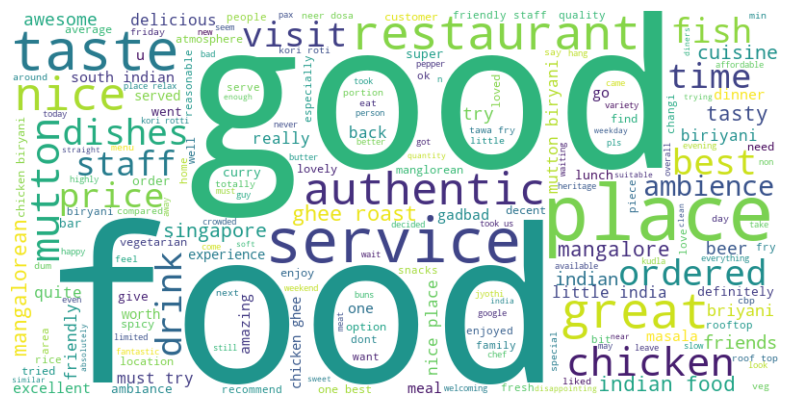

In [7]:
# Step 4: Generate the word cloud, removing stop words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.show()

In [8]:
# Define your text
text = "Hello, this is an example text, with commas."

# Remove commas
text_without_commas = text.replace(",", "")

print(text_without_commas)



Hello this is an example text with commas.
